# Analyzing Sales Data

## Data Preparation

- import dataset
- preview data
- convert date columns to datetime
- find missing value

In [1]:
import pandas as pd
df = pd.read_csv("sample-store.csv")

In [2]:
# preview top 5 rows
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,11/8/2019,11/11/2019,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,6/12/2019,6/16/2019,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,10/11/2018,10/18/2018,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
# shape of dataframe
df.shape

(9994, 21)

In [4]:
# see data frame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Order Date      9994 non-null   object 
 3   Ship Date       9994 non-null   object 
 4   Ship Mode       9994 non-null   object 
 5   Customer ID     9994 non-null   object 
 6   Customer Name   9994 non-null   object 
 7   Segment         9994 non-null   object 
 8   Country/Region  9994 non-null   object 
 9   City            9994 non-null   object 
 10  State           9994 non-null   object 
 11  Postal Code     9983 non-null   float64
 12  Region          9994 non-null   object 
 13  Product ID      9994 non-null   object 
 14  Category        9994 non-null   object 
 15  Sub-Category    9994 non-null   object 
 16  Product Name    9994 non-null   object 
 17  Sales           9994 non-null   f


**TODO - convert order date and ship date to datetime in the original dataframe**

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164



**TODO - count nan in postal code column**

In [6]:
df['Postal Code'].isna().sum()

11


**TODO - filter rows with missing values**

In [7]:
df[df['Postal Code'].isna()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
2234,2235,CA-2020-104066,2020-12-05,2020-12-10,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03,7,0.0,67.6599
5274,5275,CA-2018-162887,2018-11-07,2018-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,...,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20,3,0.0,178.8000
8798,8799,US-2019-150140,2019-04-06,2019-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,...,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75,5,0.0,336.6350
9146,9147,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98,2,0.0,42.9914
9147,9148,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04,6,0.0,2.7336
9148,9149,US-2019-165505,2019-01-23,2019-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,...,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29,13,0.0,406.7154
9386,9387,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92,4,0.0,37.5624
9387,9388,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28,1,0.0,5.7716
9388,9389,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94,3,0.0,152.0232
9389,9390,US-2020-127292,2020-01-19,2020-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,...,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04,1,0.0,0.9588



## Data Analysis 
Answer 10 below questions using pandas code to find answers.


**TODO 01 - How many columns and rows in this dataset?**

In [8]:
df.shape

(9994, 21)

This dataset has 9994 rows and 21 columns.


**TODO 02 - Is there any missing values?, if there is, which column? how many nan values?**

In [9]:
print(df.isna().sum())

Row ID             0
Order ID           0
Order Date         0
Ship Date          0
Ship Mode          0
Customer ID        0
Customer Name      0
Segment            0
Country/Region     0
City               0
State              0
Postal Code       11
Region             0
Product ID         0
Category           0
Sub-Category       0
Product Name       0
Sales              0
Quantity           0
Discount           0
Profit             0
dtype: int64


Postal code column has 11 missing values.


**TODO 03 - your friend ask for `California` data, filter it and export csv for him**
- filter `State`
- export to csv file

In [10]:
df_california = df[df['State'] == 'California']
df_california.to_csv('california.csv')


**TODO 04 - your friend ask for all order data in `California` and `Texas` in 2017 (look at Order Date), send him csv file**
- filter `State`
- filter `Order Date`
- export to csv file

In [11]:
df_state = df[ (df['State'] == 'California') | (df['State'] == 'Texas') ]
df_state_2017 = df_state[ (df_state['Order Date'] >= '2017-01-01') & (df_state['Order Date'] <= '2017-12-31') ]
df_state_2017.to_csv('df_state_2017.csv')


**TODO 05 - how much total sales, average sales, and standard deviation of sales your company make in 2017**
- filter `Order Date`
- find sum, mean and std

In [21]:
df['Sales'][ (df['Order Date'] >= '2017-01-01') & (df['Order Date'] <= '2017-12-31') ].agg(['sum', 'mean', 'std'])


**TODO 06 - which Segment has the highest profit in 2018**
- filter `Order Date`
- find sum of `Profit` group by `Segment`

In [13]:
df[ (df['Order Date'] >= '2018-01-01') & (df['Order Date'] <= '2018-12-31') ].groupby('Segment')['Profit'].sum().reset_index()

,Segment,Profit
0,Consumer,28460.1665
1,Corporate,20688.3248
2,Home Office,12470.1124


Consumer segment


**TODO 07 - which top 5 States have the least total sales between 15 April 2019 - 31 December 2019**
- filter `Order Date`
- find sum of `Sales` group by `State`
- sort values

In [14]:
df[ (df['Order Date'] >= '2019-04-15') & (df['Order Date'] <= '2019-12-31') ]\
    .groupby('State')['Sales'].sum()\
    .sort_values().reset_index().head(5)

,State,Sales
0,New Hampshire,49.05
1,New Mexico,64.08
2,District of Columbia,117.07
3,Louisiana,249.80
4,South Carolina,502.48



**TODO 08 - what is the proportion of total sales (%) in West + Central in 2019 e.g. 25%**
- filter `Order Date`
- find sum of `Sales` group by `Region`
- calculate the proportion (%) 

In [15]:
order_2019 = df[ (df['Order Date'] >= '2019-01-01') & (df['Order Date'] <= '2019-12-31') ]
sum_sales_region = order_2019.groupby('Region')['Sales'].sum()
sales_prop_west_central_2019 = round(((sum_sales_region['West'] + sum_sales_region['Central']) / sum_sales_region.sum())*100,2)

print(f"Total Sales proportion in West + Central in 2019 is {sales_prop_west_central_2019}%")

Total Sales proportion in West + Central in 2019 is 54.97%



**TODO 09 - find top 10 popular products in terms of number of orders vs. total sales during 2019-2020**
- filter `Order Date`
- count number of orders by `Product Name` and sort value
- find sum of `Sales` group by `Product Name` and sort value

In [16]:
year_2019_2020 = df[ (df['Order Date'] >= '2019-01-01') & (df['Order Date'] <= '2020-12-31') ]

top10_order = year_2019_2020.value_counts('Product Name')\
    .sort_values(ascending=False).reset_index().head(10)
top10_order.columns = ['Product Name', 'Number of orders']

top10_sales = year_2019_2020.groupby('Product Name')['Sales'].sum()\
    .sort_values(ascending=False).reset_index().head(10)

print(top10_order)
print("\n")
print(top10_sales)

                                      Product Name  Number of orders
0                                Easy-staple paper                27
1                                          Staples                24
2                                  Staple envelope                22
3                          Staples in misc. colors                13
4                                   Staple remover                12
5                          Storex Dura Pro Binders                12
6               Chromcraft Round Conference Tables                12
7  Global Wood Trimmed Manager's Task Chair, Khaki                11
8                          Avery Non-Stick Binders                11
9                       Staple-based wall hangings                10


                                        Product Name      Sales
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1               Hewlett Packard LaserJet 3310 Copier  16079.732
2   3D Systems Cube Printer, 2nd Generation, Ma


**TODO 10 - plot at least 2 plots, any plot you think interesting :)**
- Scatter plot of `Sales` and `Profit`
- Bar plot of the sum of `Sales` group by `Region`
- Barh plot of Quantity of `Segment`

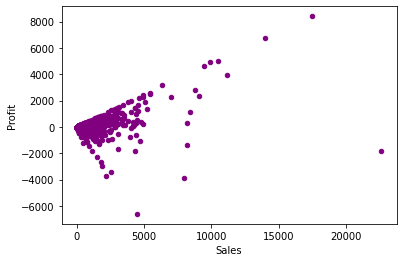

In [17]:
df[ [ 'Profit', 'Sales' ] ].plot(x='Sales', y='Profit', kind='scatter', color='purple');

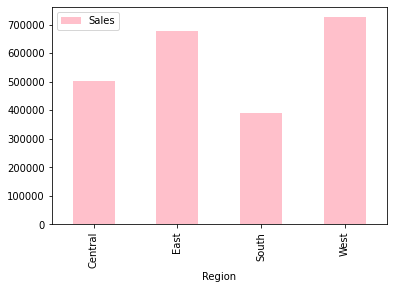

In [18]:
cat_sales = df.groupby('Region')['Sales'].sum().reset_index()
cat_sales.plot(x='Region',y='Sales',kind='bar', color='pink');

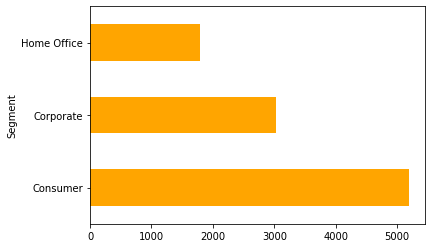

In [19]:
df.value_counts('Segment').plot(kind='barh', color='orange');


**TODO Bonus - use np.where() to create new column in dataframe to help you answer your own questions**
- create column is_profit

In [20]:
import numpy as np

df['is_profit'] = np.where( df['Profit'] > 0, "Yes", "No" )
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,is_profit
0,1,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,Yes
1,2,CA-2019-152156,2019-11-08,2019-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,Yes
2,3,CA-2019-138688,2019-06-12,2019-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,Yes
3,4,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,No
4,5,US-2018-108966,2018-10-11,2018-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,Yes
